# Intro a KNN

## Carga de datos

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datos_intro_KNN.csv')

In [3]:
df.head()

,Clase,Magnesium,Flavanoids
0,1,127,3.06
1,1,100,2.76
2,1,101,3.24
3,1,113,3.49
4,1,118,2.69


## Clasificacion con KNN

#### Variables y objetivo

In [4]:
X = df[['Magnesium', 'Flavanoids']].values
y = df['Clase'].values

## Split Train - Test

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_entrenamiento,X_prueba,y_entrenamiento,y_prueba = train_test_split(X, y, test_size=0.3, random_state=11)

## Normalizacion (por ser KNN)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
norm = StandardScaler().fit(X_entrenamiento)

In [9]:
X_entren_norm = norm.transform(X_entrenamiento)

## Modelo

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
modelo = KNeighborsClassifier(n_neighbors= 7, weights='uniform')

## Ajusto a los datos 

In [12]:
modelo.fit( X_entren_norm, y_entrenamiento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

# El modelo ya esta entrenado!

## Validacion

### Matriz de confusion

In [13]:
X_prueba_norm = norm.transform(X_prueba)

In [14]:
y_pred = modelo.predict(X_prueba_norm)

In [15]:
y_pred

array([3, 1, 2, 1, 1, 2, 2, 2, 2, 1, 3, 2, 1, 1, 2, 2, 1, 3, 2, 2, 1, 3,
       1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 3, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 3, 2, 2, 3, 2], dtype=int64)

In [16]:
pd.crosstab(y_prueba, y_pred, rownames=['Real'], colnames=['Predicho'], margins=True)

Predicho,1,2,3,All
Real,,,,
1,20,1,0,21
2,2,19,1,22
3,0,0,11,11
All,22,20,12,54


***

## Cross validation

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [18]:
modelo = KNeighborsClassifier(n_neighbors= 7, weights='uniform')

In [19]:
norm = StandardScaler().fit(X)

In [20]:
scores = cross_val_score(modelo, norm.transform(X), y, cv=3, scoring='accuracy')

In [21]:
scores

array([0.8       , 0.83333333, 0.87931034])

## Resumen

#### Modelo

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [23]:
df = pd.read_csv("datos_intro_KNN.csv")
X = df[['Magnesium', 'Flavanoids']].values
y = df['Clase'].values

norm = StandardScaler().fit(X)

In [24]:
modelo = KNeighborsClassifier(n_neighbors= 7, weights='distance')
modelo.fit(norm.transform(X), y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance')

#### Prediccion

In [25]:
df_nuevos = pd.DataFrame({'Magnesium':[100.1, 86.2], 'Flavanoids':[3.1, 2.2]})

In [26]:
df_nuevos

,Magnesium,Flavanoids
0,100.1,3.1
1,86.2,2.2


In [27]:
categorias = modelo.predict(norm.transform(df_nuevos))

In [28]:
df_nuevos["Clase"] = categorias

In [29]:
df_nuevos

,Magnesium,Flavanoids,Clase
0,100.1,3.1,1
1,86.2,2.2,2


In [30]:
df.shape

(178, 3)

***

## Visualizacion

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [32]:
X = df[['Magnesium', 'Flavanoids']].values
y = df['Clase'].values
X = norm.transform(X)

In [33]:
vecinos = 10

Graficando zonas

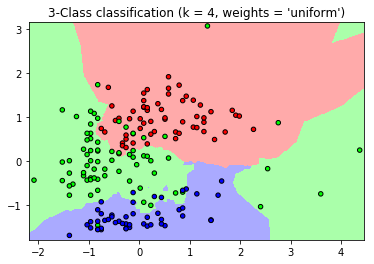

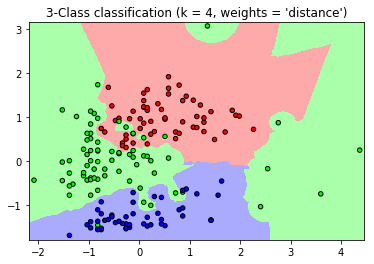

In [34]:
h = .02  # step size in the mesh
vecinos = 4
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(vecinos, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (vecinos, weights))

plt.show()

In [35]:
modelo = neighbors.KNeighborsClassifier(n_neighbors=10, weights='uniform')
clf.fit(X_norm, y)
y_pred = clf.predict(X_norm)

NameError: name 'X_norm' is not defined

In [ ]:
pd.crosstab(y, y_pred)

## Comparacion entre varios modelos de clasificacion

Los modelos que se comparan son:
* Decision Tree Classifier
* KNN
* SVC
* Voting Classifier (votan los 3 previos)

In [ ]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


In [ ]:
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=3)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = SVC(gamma=.1, kernel='linear', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 2, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()